In [2]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading csv file in the form of dataframe.
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
# Displaying basic information of the dataframe.
num_samples = len(stroke)  # Counting the number of samples
num_features = len(stroke.columns)  # Counting the number of features
feature_list = list(stroke.columns)  # Getting the list of features

print("No. of samples :", num_samples)
print("No. of features :", num_features)
print("List of features :", ", ".join(feature_list))


No. of samples : 5110
No. of features : 12
List of features : id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke


In [5]:
# Displaying random 10 samples of the dataframe.
stroke.sample(n=10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3867,9335,Female,31.0,0,0,No,Private,Rural,116.85,49.9,smokes,0
3752,5731,Female,57.0,1,0,Yes,Private,Urban,108.61,38.1,smokes,0
3241,41593,Female,76.0,0,0,Yes,Self-employed,Rural,70.29,33.4,formerly smoked,0
5029,66951,Female,72.0,0,0,Yes,Private,Urban,206.49,26.3,never smoked,0
4947,7453,Female,44.0,0,0,Yes,Private,Urban,84.07,21.2,smokes,0
2234,64494,Female,34.0,0,0,Yes,Private,Urban,133.82,20.4,never smoked,0
1584,6372,Female,32.0,0,0,Yes,Private,Urban,97.14,55.9,never smoked,0
2980,1534,Female,61.0,0,0,Yes,Private,Rural,99.35,26.1,smokes,0
3466,18040,Female,49.0,0,0,Yes,Govt_job,Rural,89.61,27.7,never smoked,0
1189,2750,Male,73.0,1,1,Yes,Self-employed,Rural,230.68,37.7,Unknown,0


    1.We have the records of 5110 patients in our data.
    2.The data has 11 independent variables that will be used to predict the dependent variable which is stroke

In [6]:
# More information about the features.
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


    1.We have missing values in the bmi column. We need to analyze the data first, in order to understand how       to deal with the missing values.

In [7]:
# summary of the numerical features.
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# A function to convert the stroke feature from integer to categorical.
def integer_to_categorical(val):
    if val == 1:
        return 'Stroke'
    else:
        return 'No Stroke'

# applying the given function to the dataframe and forming a new column with the name class.
stroke['class'] = stroke['stroke'].apply(integer_to_categorical)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Stroke


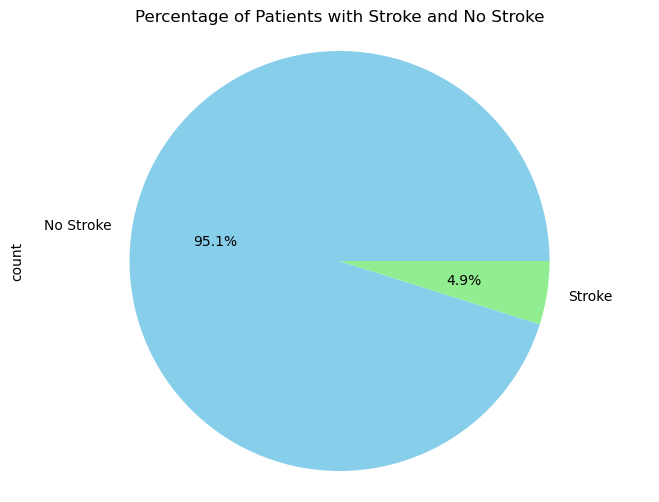

In [11]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
stroke['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])  #autopct='%1.1f%%' This will provide percentage until 1 decimal place.
plt.title('Percentage of Patients with Stroke and No Stroke')
plt.axis('equal')  
plt.show()


    The given data is highly imbalanced and biased.